In [1]:
#import dependencies

import requests
import json
import matplotlib.pyplot as plt
from citipy import citipy
from scipy.stats import linregress
import pandas as pd
import csv
import random as rand
import scipy.stats as st
from config import api_key

# Use this url when passing lat/long
# url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&lat="

# Use this url when passing city name
url = "http://api.openweathermap.org/data/2.5/weather?q="

In [2]:
#use the random module to generate lat and long for 500 cities, return city name from citipy
city_list = []

for i in range(500):
    random_lat = round(rand.uniform(-90, 90),4)
    random_long = round(rand.uniform(-180, 180),4)
    city_name = citipy.nearest_city(random_lat, random_long).city_name.title()
    city_list.append(city_name)

In [3]:
#create empty lists to use in for loop
cities = []
latitudes = []
longitudes = []
temperatures = []
humid = []
cloud = []
wind = []

# #use the random module to generate lat and long for 500 cities
# for i in range(500):
#     try:
#         random_lat = round(rand.uniform(-70, 70),4)
#         random_long = round(rand.uniform(-100, 100),4)

#         # Partial query URL for passing lat/long
#         query_url = f"{url}{random_lat}&lon={random_long}&appid={api_key}"

#use the random module to generate lat and long for 500 cities, return city name from citipy
for city in city_list:
    try:
        
        # Partial query URL for passing city name
        query_url = f"{url}{city}&appid={api_key}&units=imperial"
        
        
        # Get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()

        #get metrics from weather data api to use in list
        name = weather_json["name"]
        lat = weather_json["coord"]["lat"]
        long = weather_json["coord"]["lon"]
        temperature = weather_json["main"]["temp"]
        humidity = weather_json["main"]["humidity"]
        cloudiness = weather_json["clouds"]["all"]
        wind_speed = weather_json["wind"]["speed"]

        #append values to individual lists to use in df
        cities.append(name)
        latitudes.append(lat)
        longitudes.append(long)
        temperatures.append(temperature)
        humid.append(humidity)
        cloud.append(cloudiness)
        wind.append(wind_speed)
        print(f"Getting weather data for {name}.")
    except KeyError:
        pass


Getting weather data for Albany.
Getting weather data for Mataura.
Getting weather data for Ushuaia.
Getting weather data for Oksovskiy.
Getting weather data for Nikolskoye.
Getting weather data for São Filipe.
Getting weather data for Bethel.
Getting weather data for Port-Gentil.
Getting weather data for Quelimane.
Getting weather data for Jangaon.
Getting weather data for Moose Factory.
Getting weather data for Cockburn Town.
Getting weather data for Barrow.
Getting weather data for Hilo.
Getting weather data for Bengkulu.
Getting weather data for Portland.
Getting weather data for Maragogi.
Getting weather data for Saskylakh.
Getting weather data for Cape Town.
Getting weather data for Balaipungut.
Getting weather data for Airai.
Getting weather data for Tymovskoye.
Getting weather data for Puerto Ayora.
Getting weather data for Mayo.
Getting weather data for Gainesville.
Getting weather data for Longyearbyen.
Getting weather data for Broome.
Getting weather data for Brits.
Getting 

Getting weather data for Makokou.
Getting weather data for Luganville.
Getting weather data for Albany.
Getting weather data for Saint George.
Getting weather data for Mar del Plata.
Getting weather data for Erenhot.
Getting weather data for Castro.
Getting weather data for Mahébourg.
Getting weather data for Butaritari.
Getting weather data for Odžaci.
Getting weather data for Leningradskiy.
Getting weather data for Mount Gambier.
Getting weather data for Tuatapere.
Getting weather data for Bluff.
Getting weather data for Puerto Ayora.
Getting weather data for Coari.
Getting weather data for Ushuaia.
Getting weather data for Hithadhoo.
Getting weather data for Egvekinot.
Getting weather data for Richards Bay.
Getting weather data for Mar del Plata.
Getting weather data for Saint-Pierre.
Getting weather data for Geraldton.
Getting weather data for Punta Arenas.
Getting weather data for Upernavik.
Getting weather data for Salaga.
Getting weather data for Cidreira.
Getting weather data f

In [4]:
df = pd.DataFrame({
    "City": cities, 
    "Lat": latitudes, 
    "Long": longitudes,
    "Temp": temperatures, 
    "Humidity": humid,
    "Cloudiness": cloud,
    "Wind": wind
})
#len(df)
df.head()

,City,Lat,Long,Temp,Humidity,Cloudiness,Wind
0,Albany,42.6001,-73.9662,23.38,47,99,4.16
1,Mataura,-46.1927,168.8643,50.88,84,100,13.42
2,Ushuaia,-54.8000,-68.3000,77.00,27,0,18.41
3,Oksovskiy,62.6062,39.8984,-11.13,88,0,3.78
4,Nikolskoye,59.7035,30.7861,3.24,85,0,4.12


# The first requirement is to create a series of scatter plots to showcase the following relationships. 

## After each plot, add a sentence or two explaining what the code is analyzing.

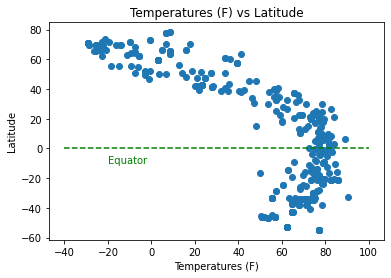

In [5]:
#Temperature (F) vs. Latitude
#---------------------------------------------------------------
plt.scatter(df['Temp'],df['Lat'])
plt.xlabel("Temperatures (F)")
plt.ylabel("Latitude")
plt.title("Temperatures (F) vs Latitude")

x_coordinates = [-40, 100]
y_coordinates = [0, 0]
equator = plt.plot(x_coordinates, y_coordinates, linestyle="dashed", color="green")
plt.annotate("Equator",(-20,-10),fontsize=10,color="green")

plt.show()

The Equator is depicted on the graph as x = 0. The temperatures increase as latitudes approach the Equator. This is identified by the sideways "U" shape on the scatter plot. 

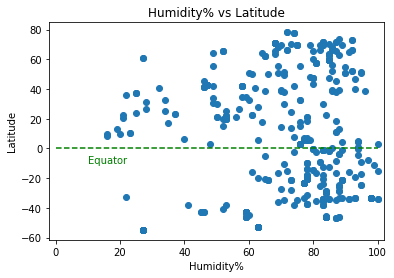

In [6]:
#Humidity (%) vs. Latitude
#---------------------------------------------------------------

plt.scatter(df['Humidity'],df['Lat'])
plt.xlabel("Humidity%")
plt.ylabel("Latitude")
plt.title("Humidity% vs Latitude")
plt.xlim(-2, 102)

x_coordinates = [0, 100]
y_coordinates = [0, 0]
equator = plt.plot(x_coordinates, y_coordinates, linestyle="dashed", color="green")
plt.annotate("Equator",(10,-10),fontsize=10,color="green")

plt.show()

The Equator is depicted on the graph as x = 0. The points are scattered throughout the graph with no obvious pattern. There does not appear to be a relationship between latitude and humidity. 

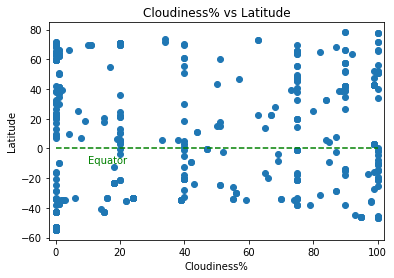

In [7]:
#Cloudiness (%) vs. Latitude
#---------------------------------------------------------------

plt.scatter(df['Cloudiness'],df['Lat'])
plt.xlabel("Cloudiness%")
plt.ylabel("Latitude")
plt.title("Cloudiness% vs Latitude")
plt.xlim(-2, 102)

x_coordinates = [0, 100]
y_coordinates = [0, 0]
equator = plt.plot(x_coordinates, y_coordinates, linestyle="dashed", color="green")
plt.annotate("Equator",(10,-10),fontsize=10,color="green")

plt.show()

This graph shows cloudiness % compared to latitude. The plots appear to be distributed throughout the graph. There does not seem to be a relationship between cloudiness and distance from the Equator.

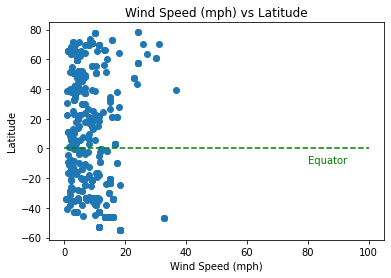

In [8]:
#Wind Speed (mph) vs. Latitude
#---------------------------------------------------------------

plt.scatter(df['Wind'],df['Lat'])
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.title("Wind Speed (mph) vs Latitude")

x_coordinates = [0, 100]
y_coordinates = [0, 0]
equator = plt.plot(x_coordinates, y_coordinates, linestyle="dashed", color="green")
plt.annotate("Equator",(80,-10),fontsize=10,color="green")

plt.show()

The wind speeds at latitudes furthest from the Equator appear to be slightly more than those nearest the Equator once latitude values are above 40 degrees and below negative 40 degrees.

# The second requirement is to run linear regression on each relationship. 
This time, separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude).

After each pair of plots, take the time to explain what the linear regression is modeling. 
For example, describe any relationships you notice and any other analysis you may have.

Save a CSV of all retrieved data and a PNG image for each scatter plot.

In [9]:
#Northern Hemisphere dataframe where latitude is greater than or equal to 0
df_north = df.loc[df["Lat"]>=0]

#Southern Hemisphere dataframe where latitude is less than 0
df_south = df.loc[df["Lat"]<0]

The correlation between Temp and Lat in the North Hemi is -0.91
The r-value between Temp and Lat in the North Hemi is 0.8323888452241299


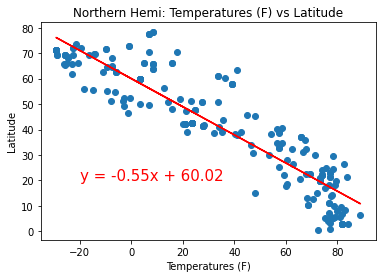

The correlation between Temp and Lat in the South Hemi is 0.57
The r-value between Temp and Lat in the South Hemi is 0.3199129010472118


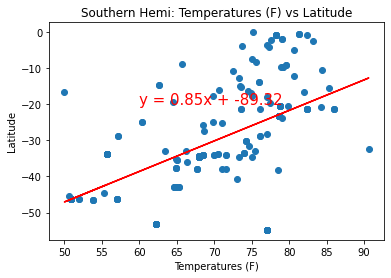

In [16]:
# Add the linear regression equation and line to plot
# Northern Hemisphere - Temperature (F) vs. Latitude

x_values = df_north['Temp']
y_values = df_north['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,20),fontsize=15,color="red")
plt.xlabel("Temperatures (F)")
plt.ylabel("Latitude")
plt.title("Northern Hemi: Temperatures (F) vs Latitude")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between Temp and Lat in the North Hemi is {round(correlation[0],2)}")
print(f"The r-value between Temp and Lat in the North Hemi is {rvalue**2}")

plt.savefig("images/north_hemi_temperatures.png")
plt.show()

# Southern Hemisphere - Temperature (F) vs. Latitude

x_values = df_south['Temp']
y_values = df_south['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,-20),fontsize=15,color="red")
plt.xlabel("Temperatures (F)")
plt.ylabel("Latitude")
plt.title("Southern Hemi: Temperatures (F) vs Latitude")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between Temp and Lat in the South Hemi is {round(correlation[0],2)}")
print(f"The r-value between Temp and Lat in the South Hemi is {rvalue**2}")

plt.savefig("images/south_hemi_temperatures.png")
plt.show()

As you get closer to the Equator, latitude decreases and temperature increases. The correlation for the Northern Hemisphere is -0.91 and Southern Hemisphere is 0.57. The regression line visibly shows the relationship as well. On the Northern Hemisphere plot, the line directs down indicating temperature increasing as latitude decreases, or gets closer to the Equator. On the Southern Hemisphere plot, the line directs up indicating temperature increasing as latitude increases, or gets closer to the Equator.

The correlation between Humidity and Lat in the North Hemi is 0.28
The r-value between Humidity and Lat in the North Hemi is 0.0772665369163262


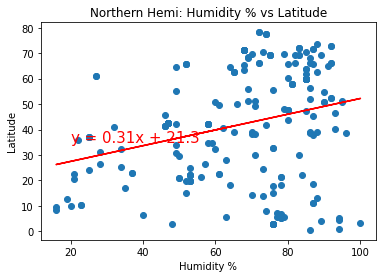

The correlation between Humidity and Lat in the South Hemi is 0.47
The r-value between Humidity and Lat in the South Hemi is 0.21716932496230543


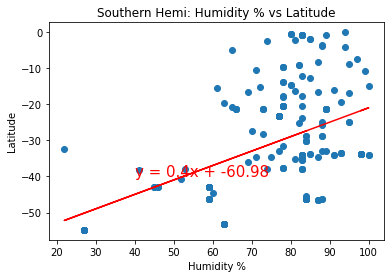

In [17]:
# Northern Hemisphere - Humidity (%) vs. Latitude
x_values = df_north['Humidity']
y_values = df_north['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")
plt.xlabel("Humidity %")
plt.ylabel("Latitude")
plt.title("Northern Hemi: Humidity % vs Latitude")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between Humidity and Lat in the North Hemi is {round(correlation[0],2)}")
print(f"The r-value between Humidity and Lat in the North Hemi is {rvalue**2}")


plt.savefig("images/north_hemi_humidity.png")
plt.show()

# Southern Hemisphere - Humidity (%) vs. Latitude
x_values = df_south['Humidity']
y_values = df_south['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,-40),fontsize=15,color="red")
plt.xlabel("Humidity %")
plt.ylabel("Latitude")
plt.title("Southern Hemi: Humidity % vs Latitude")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between Humidity and Lat in the South Hemi is {round(correlation[0],2)}")
print(f"The r-value between Humidity and Lat in the South Hemi is {rvalue**2}")


plt.savefig("images/south_hemi_humidity.png")
plt.show()

While the relationship between humidity and latitude is not as strong as temperature and latitude, one still appears to exist at least in the Southern Hemisphere. The correlation for the Northern Hemisphere is 0.28 and Southern Hemisphere is 0.47. 

The correlation between Cloudiness and Lat in the North Hemi is 0.03
The rvalue between Cloudiness and Lat in the North Hemi is 0.0009126656669902517


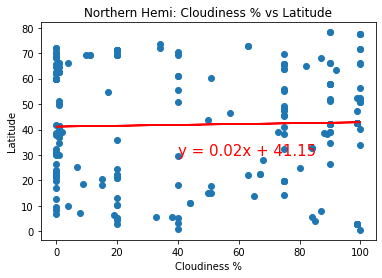

The correlation between Cloudiness and Lat in the South Hemi is 0.22
The rvalue between Cloudiness and Lat in the South Hemi is 0.04690612219521695


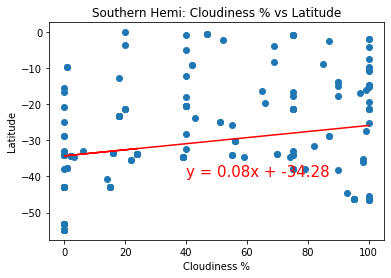

In [20]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude
x_values = df_north['Cloudiness']
y_values = df_north['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.xlabel("Cloudiness %")
plt.ylabel("Latitude")
plt.title("Northern Hemi: Cloudiness % vs Latitude")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between Cloudiness and Lat in the North Hemi is {round(correlation[0],2)}")
print(f"The rvalue between Cloudiness and Lat in the North Hemi is {rvalue**2}")

plt.savefig("images/north_hemi_cloudiness.png")
plt.show()

#Southern Hemisphere - Cloudiness (%) vs. Latitude
x_values = df_south['Cloudiness']
y_values = df_south['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,-40),fontsize=15,color="red")
plt.xlabel("Cloudiness %")
plt.ylabel("Latitude")
plt.title("Southern Hemi: Cloudiness % vs Latitude")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between Cloudiness and Lat in the South Hemi is {round(correlation[0],2)}")
print(f"The rvalue between Cloudiness and Lat in the South Hemi is {rvalue**2}")

plt.savefig("images/south_hemi_cloudiness.png")
plt.show()

The scatter plots for both Northern and Southern Hemisphere graphs on cloudiness compared to latitude is not statistically significant. The regression lines on both charts are near flat, or horizontal. The correlation for both the Northern and Southern Hemispheres is 0.03 and 0.22 respectively. Distance from the Equator does not appear to have an effect on cloudiness. 

The correlation between wind speed and lat in the North Hemi is 0.12
The rvalue between wind speed and lat in the North Hemi is 0.014250576929345575


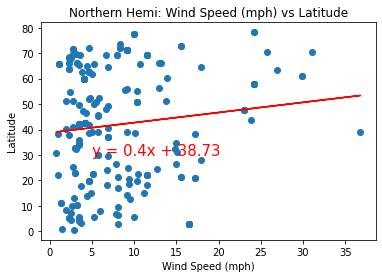

The correlation between wind speed and lat in the South Hemi is -0.36
The rvalue between wind speed and lat in the South Hemi is 0.13043281854585206


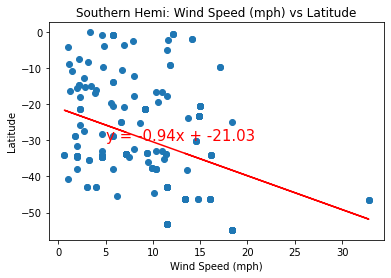

In [21]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = df_north['Wind']
y_values = df_north['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,30),fontsize=15,color="red")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.title("Northern Hemi: Wind Speed (mph) vs Latitude")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between wind speed and lat in the North Hemi is {round(correlation[0],2)}")
print(f"The rvalue between wind speed and lat in the North Hemi is {rvalue**2}")

plt.savefig("images/north_hemi_windspeed.png")
plt.show()

#Southern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = df_south['Wind']
y_values = df_south['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,-30),fontsize=15,color="red")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.title("Southern Hemi: Wind Speed (mph) vs Latitude")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between wind speed and lat in the South Hemi is {round(correlation[0],2)}")
print(f"The rvalue between wind speed and lat in the South Hemi is {rvalue**2}")

plt.savefig("images/south_hemi_windspeed.png")
plt.show()

Wind speeds in the Southern Hemisphere appear to have more of a direct correlation with distance from the Equator than the wind speeds in the North Hemisphere. While the correlation in the Northern Hemisphere is only 0.12, the correlation in the Southern Hemisphere is -0.36. The slope of the regression line is also more pronounced in the Southern Hemisphere at -0.94 while the North is 0.4.

In [14]:
#export dataframes to csv files

df.to_csv("./Resources/orig_weather_data.csv")
df_north.to_csv("./Resources/northHemi_weather_data.csv")
df_south.to_csv("./Resources/southHemi_weather_data.csv")